# <font color='green'>Bonus Homework</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2022<br>
Course: Performance Evaluation of Computer Systems<br>
Instructor: Dr. Ahmad Khonsari<br>
Chief TA: Bahereh Hassanpour<br> </b> 
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Importing Required Packages</span>

In [63]:
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import math

# <span style="color:purple" size="16">Classical Statistical Inference (Chapter 9)</span>

<b><span style="color:red">Problem #1</span></br>
<span>Alice models the time that she spends each week on homework as 
an exponentially distributed random variable with unknown parameter $\theta$. Homework 
times in different weeks are independent. After spending 10, 14, 18, 8, and 20 hours in 
the first 5 weeks of the semester,<br> what is her ML estimate of $\theta$</span>


<b><span style="color:red">Code Section for Problem #1</span></br>


parameter value (theory): 0.07142857142857142
parameter value:  0.0708


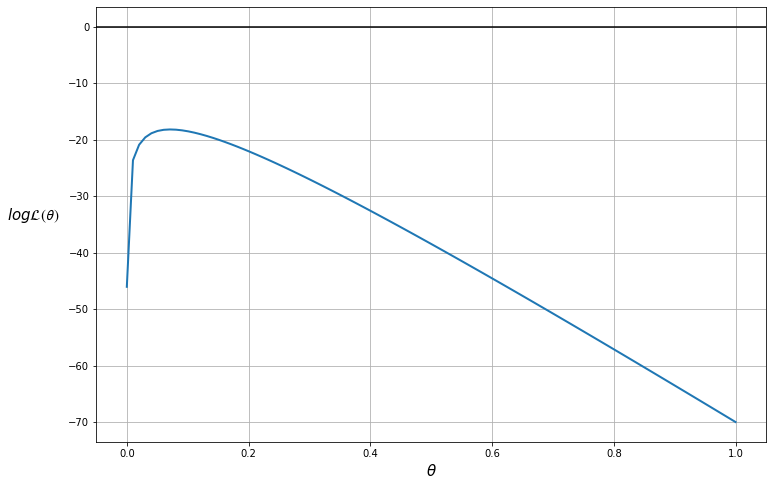

In [64]:
def show_plot(theta, logL):
    fig, (ax) = plt.subplots(1, sharex=True, figsize=(12, 8))
    ax.plot(theta, logL, lw=2)
    ax.set_xlabel(r'$\theta$', fontsize=15)
    ax.set_ylabel(r'$log \mathcal{L(\theta)}$',
                   rotation=0,
                   labelpad=35,
                   fontsize=15)
    ax.grid()
    plt.axhline(c='black')
    plt.show()
    
    
def exp_log_likelihood(theta, observation):

    logL = len(observation)*np.log(theta) - theta*sum(observation)
    return logL


theta = np.linspace(0.0001,1,100)
x = [8, 10, 14, 18, 20]
logL = exp_log_likelihood(theta, x)

print('parameter value (theory):', len(x)/sum(x))
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)

<b><span style="color:red">Problem #2</span></br>
<span>Consider a sequence of independent coin tosses, and let $\theta$ be the probability of heads at each toss.<br> 
(a) Fix some k and let N be the number of tosses until the k-th head occurs. Find 
the ML estimator of $\theta$ based on N.<br>
(b) Fix some n and let K be the number of heads observed in n tosses. Find the ML 
estimator of $\theta$ based on K. </span>

<b><span style="color:red">Code Section for Problem #2 part a</span></br>

parameter value (theory): 0.5
parameter value:  0.495050505050505


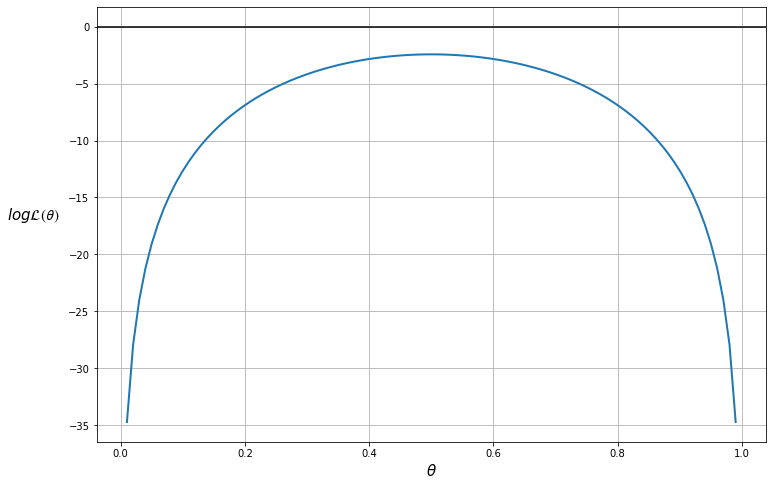

In [65]:
def pascal_log_likelihood(theta, k, n):

    logL = np.log(comb(n-1, k-1) * theta**k * (1-theta)**(n-k))
    return logL


theta = np.linspace(0.01,0.99,100)

# k is fixed and n = k, k+1, ...
k = 10
n = 20

logL = pascal_log_likelihood(theta, k, n)

print('parameter value (theory):', k/n)
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)

parameter value (theory): 0.4
parameter value:  0.39606060606060606


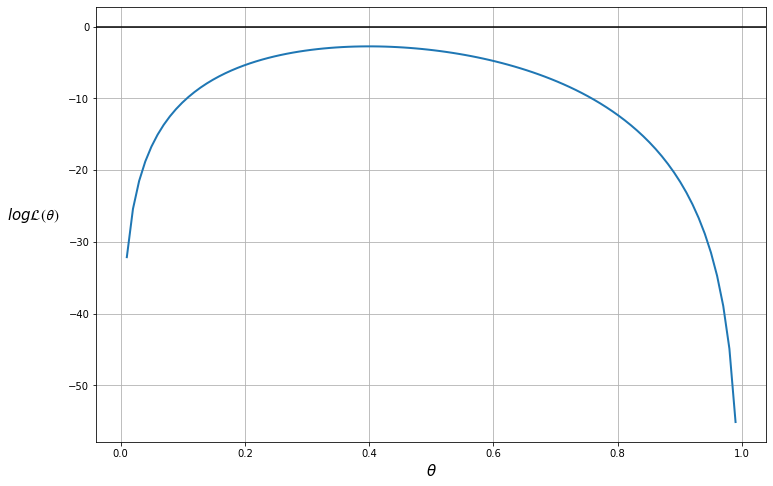

In [66]:
n = 25

logL = pascal_log_likelihood(theta, k, n)

print('parameter value (theory):', k/n)
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)

<b><span style="color:red">Code Section for Problem #2 part b</span></br>

parameter value (theory): 0.6363636363636364
parameter value:  0.6336363636363637


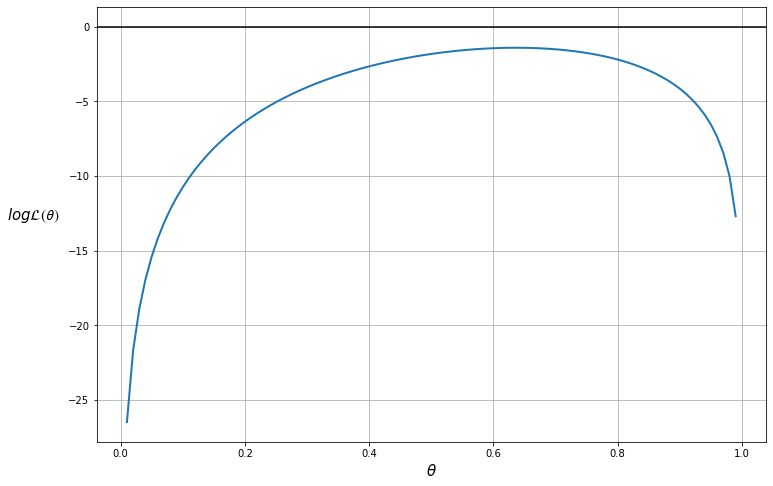

In [67]:
def binomial_log_likelihood(theta, k, n):

    logL = np.log(comb(n, k) * theta**k * (1-theta)**(n-k))
    return logL


theta = np.linspace(0.01,0.99,100)

# n is fixed and k = 0, 1, ..., n
k = 7
n = 11

logL = binomial_log_likelihood(theta, k, n)

print('parameter value (theory):', k/n)
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)

<b><span style="color:red">Problem #3</span></br>
<span style="text-decoration:underline">Sampling and estimation of sums</span><br />
<span>We have a box with $k$ balls; $\bar{k}$ of 
them are white and $k - \bar{k}$ are red. Both k and $\bar{k}$ are assumed known. 
<br> Each white ball 
has a nonzero number on it, and each red ball has zero on it. We want to calculate 
the sum of all the ball numbers, 
<br>but because k is very large, we resort to estimating 
it by sampling. This problem aims to quantify the advantages of sampling only white 
balls/nonzero numbers and exploiting the knowledge of $\bar{k}$. In particular, we wish to 
compare the error variance when we sample 
<br>n balls with the error variance when we 
sample a smaller number m of white balls. 
<br>
(a) Suppose we draw balls sequentially and independently, according to a uniform 
distribution (with replacement).
<br> Denote by Xi the number on the ith ball drawn, 
and by Y, the number on the i-th white ball drawn. 
<br>We fix two positive integers 
n and m , and denote: $\hat{S} = \frac{k}{n} \Sigma_{i=1}^{n} X_{i}$, $\bar{S} = \frac{\bar{k}}{n} \Sigma_{i=1}^{n} X_{i}$ and $\tilde{S} = \frac{\bar{k}}{n} \Sigma_{i=1}^{n} Y_{i}$
<br>where$\bar{N}$ is the (random) number of white balls drawn in the first n samples.
Show that $\bar{S}$, $\hat{S}$ and $\tilde{S}$ are unbiased estimators of the 
<br>sum of all the ball numbers.
<br>(b) Calculate the variances of $\bar{S}$ and $\hat{S}$, and show that in order for them to be 
approximately equal, we must have $m \approx \frac{np}{p+r(1-p)}$
<br> where $p = \frac{\bar{k}}{k}$ and $r = E[Y_{i}^{2}]/var(Y)$. Show also that when m=n, $\frac{var(\tilde{S})}{var(\hat{S})} = \frac{p}{p + r(1-p)}$
<br>(c) Calculate the variance of $\bar{S}$, and show that for large n, $\frac{var(\tilde{S})}{var(\hat{S})} = \frac{p}{p + r(1-p)}$ </span>

<b><span style="color:red">Code Section for Problem #3</span></br>

In [68]:
def claculate_mean_of_white_balls():
    n = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 130, 140, 150, 160, 170, 180, 190, 200]
    num_of_white_balls = []
    for item in n:
        x = np.round(np.random.random(item) * largest_num_on_white)
        y = x[x > 0]
        num_of_white_balls.append(len(y))
    N_bar = sum(num_of_white_balls) / len(num_of_white_balls)
    return N_bar
    
    
k_bar = 50
k = 500
# num of samples
n = 100
largest_num_on_white = 5
x = np.round(np.random.random(n) * largest_num_on_white)
y = x[x > 0]
m = len(y)
numbers_on_balls = np.round(np.random.random(k_bar) * (largest_num_on_white - 1)) + 1
N_bar = claculate_mean_of_white_balls()

# and now we simulate the mentioned estimators
S = sum(numbers_on_balls)
S_hat = (k_bar / n) * sum(x)
S_tilde = (k_bar / len(y)) * sum(y)
S_bar = (k_bar / N_bar) * sum(x)

print('actual summation of numbers on balls: ', S)
print('obtained summation of numbers on balls by S_hat estimator:', round(S_hat))
print('obtained summation of numbers on balls by S_tilde estimator:', round(S_tilde))
print('obtained summation of numbers on balls by S_bar estimator:', round(S_bar))

actual summation of numbers on balls:  143.0
obtained summation of numbers on balls by S_hat estimator: 121
obtained summation of numbers on balls by S_tilde estimator: 136
obtained summation of numbers on balls by S_bar estimator: 128


<b><span style="color:red">Problem #4</span></br>
<span style="text-decoration:underline">Mixture models</span><br />
<span>Let the PDF of a random variable X be the mixture 
of m components: $f_{X}(x) = \Sigma_{j=1}^{m} p_{j}f_{Y_{j}}(x)$
where $\Sigma_{j=1}^{m} p_{j} = 1$, $p_{j} \geq 0$, for $j = 1, ..., m$
<br>Thus, X can be viewed as being generated by a two-step process: first draw j randomly 
according to probabilities $p_{j}$, 
<br>then draw randomly according to the distribution of $Y_{j}$. 
Assume that each $Y_{j}$; is normal with mean $\mu_{j}$ and variance $\sigma_{j}^{2}$, 
<br>and that we have a set of i.i.d. observations $X_{1} . . .. , X_{n}$, each with PDF $f_{X}$. 
<br>(a) Write down the likelihood and log-likelihood functions. 
<br>(b) Consider the case m = 2 and n = 1, and assume that $\mu_{1}$, $\mu_{2}$, $\sigma_{1}$ and $\sigma_{2}$ are known. Find the ML estimates of $p_{1}$ and $p_{2}$. 
<br>(c) Consider the case m = 2 and n = 1, and assume that $p_{1}$, $p_{2}$, $\sigma_{1}$ and $\sigma_{2}$ are known. Find the ML estimates of $\mu_{1}$ and $\mu_{2}$.</span>

<b><span style="color:red">Code Section for Problem #4 part b</span></br>

In [69]:
def gaussian_log_likelihood(p, mu1, mu2, sigma1, sigma2, observation):
    logL = [] 
    n = len(p)
    for i in range(n):
        term1_pdf = 0
        term2_pdf = 0
        for item in observation:
            term1_pdf += (1/math.sqrt(2*math.pi*sigma1)) * math.exp(-(item - mu1)**2/(2*sigma1**2))
            term2_pdf += (1/math.sqrt(2*math.pi*sigma2)) * math.exp(-(item - mu2)**2 / (2*sigma2**2))
        logL.append(np.log(p[i]*term1_pdf + (1-p[i])*term2_pdf))
        
    return logL


sigma = [2, 1]
mu = [0, 8]
x = np.random.normal(0, 1, 1000)  
p = np.linspace(0, 1, 100)                                                                                         
logL = gaussian_log_likelihood(p, mu[0], mu[1], sigma[0], sigma[1], x)
result = np.where(logL == np.amax(logL))
print('parameter value: ', p[int(result[0][0])]) 

sigma = [1, 1]
mu = [0, 0]
x = np.random.normal(0, 1, 1000)  
p = np.linspace(0, 1, 100)                                                                                         
logL = gaussian_log_likelihood(p, mu[0], mu[1], sigma[0], sigma[1], x)
result = np.where(logL == np.amax(logL))
print('parameter value: ', p[int(result[0][0])])
print('based on the value of pdfs, it is 1 in the case that value of pdf1 is greater than pdf2')                                                                                       

parameter value:  1.0
parameter value:  0.0
based on the value of pdfs, it is 1 in the case that value of pdf1 is greater than pdf2


<b><span style="color:red">Explainations for Problem #4 part c</span></br>
<span>The likelihood function is the sum of two terms [the code to part (b)], the first
involving $\mu_{1}$, the second involving $\mu_{2}$. 
<br>Thus, we can maximize each term separately
and find that the ML estimates are $\hat{\mu_{1}} = \hat{\mu_{2}} = x$</span>

<b><span style="color:red">Problem #5</span></br>
Unstable particles are emitted from a source and decay at a distance 
X, which is exponentially distributed with unknown parameter $\theta$. 
<br>A special device is 
used to detect the first n decay events that occur in the interval $[m_{1} , m_{2}]$ . 
<br>Suppose 
that these events are recorded at distances $X = (X_{1} , ... , X_{n})$. 
<br>(a) Give the form of the likelihood and log-likelihood functions. 
<br>(b) Assume that $m_{1} = 1$, $m_{2} = 20$, n = 6, and $X = (1.5, 2, 3, 4, 5, 12)$. 
<br>Plot the likelihood and log-likelihood as functions of $\theta$. Find approximately the ML estimate 
of $\theta$ based on your plot. 

<b><span style="color:red">Code Section for Problem #5</span></br>

parameter value:  0.30400000000000005


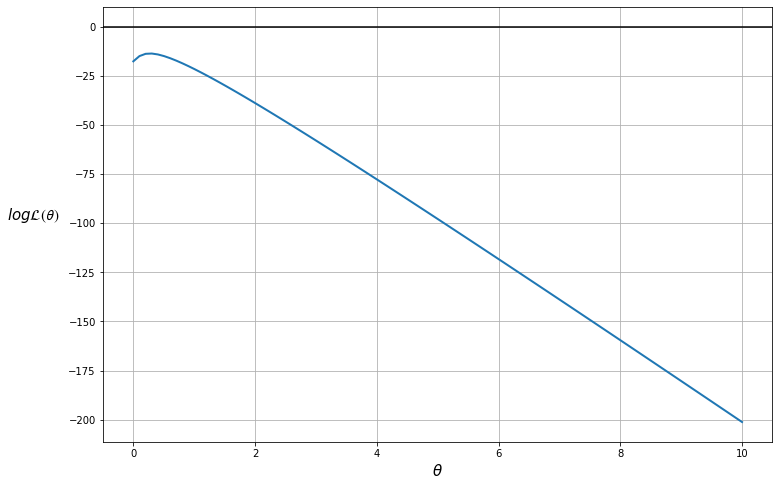

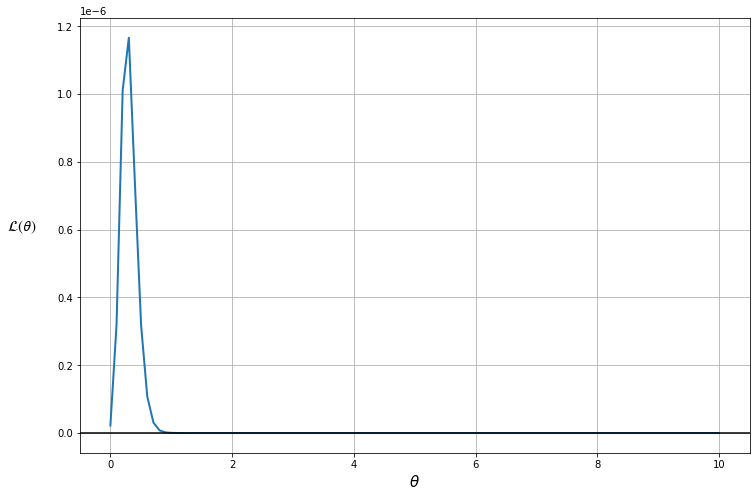

In [70]:
def expon_log_likelihood(m1, m2, theta, observation):
    expon_term = []
    for item in theta:
        expon_term.append(math.exp(-m1*item)-math.exp(-m2*item))
    logL = -len(observation) * np.log(np.array(expon_term)) + len(observation)*np.log(theta) - theta * sum(observation)
    return logL


def expon_likelihood(m1, m2, theta, observation):
    expon_term = []
    exp_theta_sumx = []
    for item in theta:
        expon_term.append(math.exp(-m1*item)-math.exp(-m2*item))
        exp_theta_sumx.append(math.exp(-item*sum(observation)))
    L = (np.array(expon_term) ** (-len(observation))) * (theta ** len(observation)) * np.array(exp_theta_sumx)
    return L


theta = np.linspace(0.001, 10, 100)
x = [1.5, 2, 3, 4, 5, 12]
m1 = 1
m2 = 20
logL = expon_log_likelihood(m1, m2, theta, x)
L = expon_likelihood(m1, m2, theta, x)
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)
show_plot_likelihood(theta, L)

<b><span style="color:red">Problem #6</span></br>
Consider a study of student heights in a middle school. Assume that the 
height of a female student is normally distributed with 
<br>mean $\mu_{1}$ and variance $\sigma_{1}^{2}$, and 
that the height of a male student is normally distributed with mean $\mu_{1}$ and variance $\sigma_{1}^{2}$. 
<br>Assume that a student is equally likely to be male or female. A sample of size 
n = 10 was collected. and the fullowing values were recorded 
<br>(in centimeters): $[164, 167, 163, 1 58, 170, 183, 176, 159, 170, 167]$.
<br>a) Assume that $\mu_{1}$, $\mu_{2}$, $\sigma_{1}$, $\sigma_{2}$ are unknown. Write down the likelihood function. 
<br>(b) Assume we know that $\sigma_{1}^{2} = 9$ and $\mu_{1} = 164$. Find numerically the ML estimates 
of $\mu_{2}$ and $\sigma_{2}$. 
<br>(c) Assume we know that $\sigma_{1}^{2} = \sigma_{2}^{2} = 9$. Find numerically the ML estimates of $\mu_{1}$ 
and $\mu_{2}$ . 
<br>(d) Treating the estimates obtained in part (c) as exact values, describe the MAP 
rule 
<br>for deciding a student's gender based on the student's height.

<b><span style="color:red">Code Section for Problem #6 part b</span></br>

In [71]:
def show_plot_likelihood(theta, L):
    fig, (ax) = plt.subplots(1, sharex=True, figsize=(12, 8))
    ax.plot(theta, L, lw=2)
    ax.set_xlabel(r'$\theta$', fontsize=15)
    ax.set_ylabel(r'$\mathcal{L(\theta)}$',
                   rotation=0,
                   labelpad=35,
                   fontsize=15)
    ax.grid()
    plt.axhline(c='black')
    plt.show()

In [72]:
n = 10
height = [164, 167, 163, 158, 170, 183, 176, 159, 170, 167]

def gaussian_log_likelihood_finding_mu_sigma(mu1, sigma1, mu2, sigma2, x):
    logL = [] 
    # because input of math.exp() must be an 1D array
    for mu in mu2:
        female_pdf = 0
        for sigma in sigma2:
            for item in x:
                male_pdf = (1/math.sqrt(2*math.pi*sigma1)) * math.exp(-(item - mu1)**2/(2*sigma1**2))
                female_pdf += (1/math.sqrt(2*math.pi*sigma)) * math.exp(-(item - mu)**2 / (2*sigma**2))
        logL.append(np.log(male_pdf + female_pdf) / 2)
        
    return logL


mu1 = 164
sigma1 = 3
mu2 = np.linspace(150, 180, 100)
sigma2 = np.linspace(5, 10, 100)

logL = gaussian_log_likelihood_finding_mu_sigma(mu1, sigma1, mu2, sigma2, height)
result = np.where(logL == np.amax(logL))
print('parameter value of mu2: ', mu2[int(result[0])])
print('parameter value of sigma2: ', sigma2[int(result[0])])

parameter value of mu2:  166.06060606060606
parameter value of sigma2:  7.6767676767676765


<b><span style="color:red">Code Section for Problem #6 part c</span></br>

In [73]:
def gaussian_log_likelihood_finding_mu1_mu2(mu1, sigma1, mu2, sigma2, x):
    logL = [] 
    n = len(mu1)
    for i in range(n):
        male_pdf = 0
        female_pdf = 0
        for item in x:
            male_pdf += (1/math.sqrt(2*math.pi*sigma1)) * math.exp(-(item - mu1[i])**2/(2*sigma1**2))
            female_pdf += (1/math.sqrt(2*math.pi*sigma2)) * math.exp(-(item - mu2[i])**2 / (2*sigma2**2))
        logL.append(np.log(male_pdf + female_pdf) / 2)
        
    return logL


sigma1 = 3
sigma2 = 3
# in order to avoid mu1 = mu2
mu1 = np.linspace(155, 185, 100)
mu2 = np.linspace(155, 185, 500)

logL = gaussian_log_likelihood_finding_mu1_mu2(mu1, sigma1, mu2, sigma2, height)
result = np.where(logL == np.amax(logL))
print('parameter value of mu1: ', mu1[int(result[0])])
print('parameter value of mu2: ', mu2[int(result[0])])

parameter value of mu1:  167.42424242424244
parameter value of mu2:  157.46492985971943


<b><span style="color:red">Explainations for Problem #6 part d</span></br>
The MAP rule involves a comparison of the two numerators. When $\sigma_{1}$ = $\sigma_{2}$, it reduces
to a comparison of |x − $\mu_{1}$| to |x − $\mu_{1}$|. 
<br>Using the estimates in part (c), we will decide
that the student is female if x < (167 + 157)/2 = 162.5, and male otherwise.

<b><span style="color:red">Problem #7</span></br>
<span style="text-decoration:underline">Estimating the parameter of a Poisson random variable</span><br />
Derive the ML estimator of the parameter of a Poisson random variable based on i.i.d. 
observations $ X_{1}, ... , X_{n}$ . 
<br>Is the estimator unbiased and consistent?

<b><span style="color:red">Code Section for Problem #7</span></br>

parameter value (theory): 4.84
parameter value:  4.830176352705411


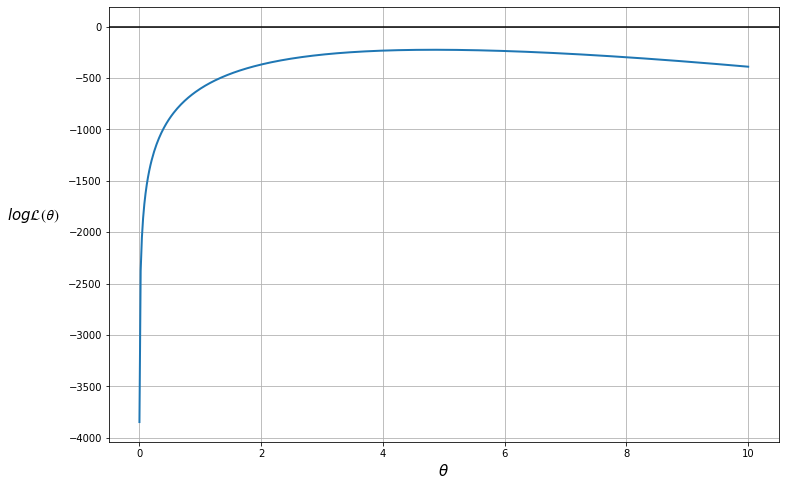

In [74]:
def poisson_logL(observation, theta):
    # unbiased estimator
    sum_of_log_x_fact = []
    for item in observation:
        sum_of_log_x_fact.append(np.log(math.factorial(item)))
        
    logL = -len(observation) * theta + sum(observation) * np.log(theta) - sum(sum_of_log_x_fact)
    return logL


theta = np.linspace(0.001, 10, 500)
np.random.seed(0)
lam = 5
size = 100
# generating poisson samples
x = np.random.poisson(lam, size)
print('parameter value (theory):', sum(x)/len(x))

logL = poisson_logL(x, theta)
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)

This estimator is unbiased and consistent.

<b><span style="color:red">Problem #8</span></br>
<span style="text-decoration:underline">Estimating the parameter of a uniform random variable I</span><br />
<span>We are given i.i.d. observations $X_{1}, ..., X_{n}$ that are uniformly distributed over the interval 
$[0,\theta]$. 
<br>What is the ML estimator of $\theta$? Is it consistent? Is it unbiased or asymptotically 
unbiased? 
<br>Can you construct alternative estimators that are unbiased?</span>

<b><span style="color:red">Code Section for Problem #8</span></br>

parameter value (theory): 4.9504950495049505
parameter value:  4.94949494949495


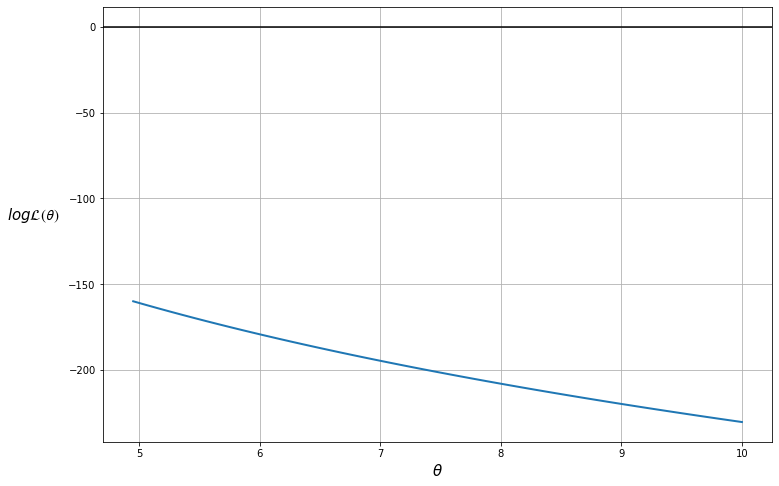

In [75]:
def uniform_logL_i(observation, theta):
    # not unbiased, but asymptotically unbiased
    x_max = np.max(observation)
    n = len(observation)
    logL = []
    for item in theta:
        if item < x_max:
            logL.append(-np.inf)
        else:
            logL.append(-n*np.log(item))
        
    return np.array(logL)


theta = np.linspace(0, 10, 100)
np.random.seed(0)
stop = 5
x = stop * np.random.random(100)
n = len(x)
print('parameter value (theory):', (n / (n + 1)) * stop)

logL = uniform_logL_i(x, theta)
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)

$\hat{\theta}$ is not unbiased, but it is asymptotically unbiased.<br>
Some alternative estimators that are unbiased are a scaled version of the ML
estimator

parameter value (theory): 5
parameter value:  5.05050505050505


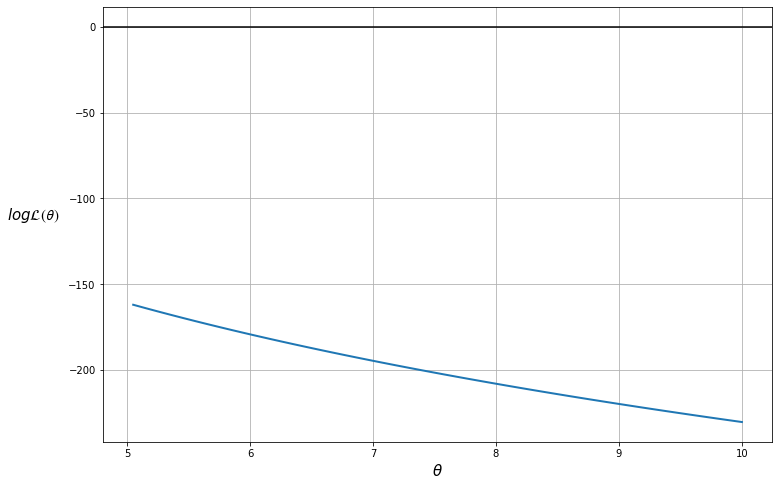

In [76]:
def uniform_logL_unbiased(observation, theta):
    x_max = np.max(observation)
    n = len(observation)
    # scale = (n + 1) / n
    boundary = ((n + 1) / n) * x_max
    logL = []
    for item in theta:
        if item < boundary:
            logL.append(-np.inf)
        else:
            logL.append(-n*np.log(item))
        
    return np.array(logL)


theta = np.linspace(0, 10, 100)
np.random.seed(0)
stop = 5
x = stop * np.random.random(100)
print('parameter value (theory):', stop)

logL = uniform_logL_unbiased(x, theta)
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)

<b><span style="color:red">Problem #9</span></br>
<span style="text-decoration:underline">Estimating the parameter of a uniform random variable II</span><br />
<span>We are given i.i.d. observations $X_{1}, ..., X_{n}$ that are uniformly distributed over the interval 
$[\theta, \theta + 1]$. 
<br>Find a ML estimator of $\theta$. Is it consistent? Is it unbiased or asymptotically 
unbiased?</span>

<b><span style="color:red">Code Section for Problem #9</span></br>

parameter value (theory): 5.996534657125887
parameter value:  5.98989898989899


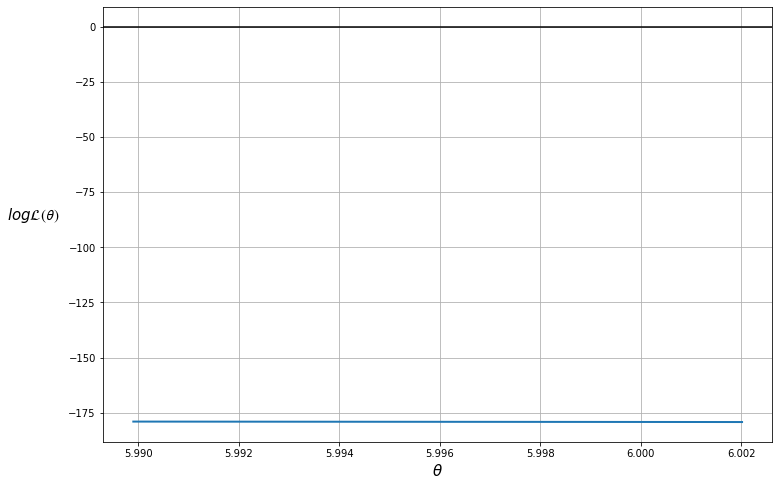

log-likelihood [         -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf -179.00745489 -179.07488577 -179.14227122
 -179.20961129          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf          -inf
          -inf          -inf          -inf          -inf      

In [77]:
def uniform_logL_ii(observation, theta):
    # unbiased maximum likelihood estimator
    x_max = np.max(observation)
    x_min = np.min(observation)
    n = len(observation)
    logL = []
    for item in theta:
        # x_max - 1 < theta < x_min < x_max < theta + 1 < x_min + 1
        if (item < x_min) and (item + 1 > x_max):
            logL.append(-n*np.log(item))
        else:
            logL.append(-np.inf)
        
    return np.array(logL)


start = 6
theta = np.linspace(5.8, 6.2, 100)
np.random.seed(0)
x = start + np.random.random(100)
print('parameter value (theory):', (np.max(x) + np.min(x) - 1)/2)

# the values of logL function are too tight
logL = uniform_logL_ii(x, theta)
result = np.where(logL == np.amax(logL))
print('parameter value: ', theta[int(result[0])])

show_plot(theta, logL)
print('log-likelihood', logL)

This estimator in unbiased.

<b><span style="color:red">Problem #10</span></br>
<span>A source emits a random number of photons K each time that it is 
triggered. We assume that the PMF of K is: 
<br>$p_{k}(k, \theta) = c(\theta)e^{-\theta k}$, k = 0, 1, 2, ....
where $\theta$ is the inverse of the temperature of the source and c($\theta$) is a normalization 
factor.
<br>We also assume that the photon emissions each time that the source is triggered 
are independent. 
<br>We want to estimate the temperature of the source by triggering it 
repeatedly and counting the number of emitted photons. 
<br>(a) Determine the normalization factor c($\theta$). 
<br>(b) Find the expected value and the variance of the number K of photons emitted if 
the source is triggered once. 
<br>(c) Derive the ML estimator for the temperature $\Psi = \frac{1}{\theta}$, based on $K_{1}, K_{2}, ..., K_{n}$, the 
numbers of photons emitted when the source is triggered n times. 
<br>(d) Show that the ML estimator is consistent. </span>

<b><span style="color:red">Code Section for Problem #10</span></br>

parameter value (theory):  0.19709926309455403
parameter value:  0.2021181818181818
optimum value of temperature (theory):  5.073585686214727
optimum value of temperature:  4.947600413799307


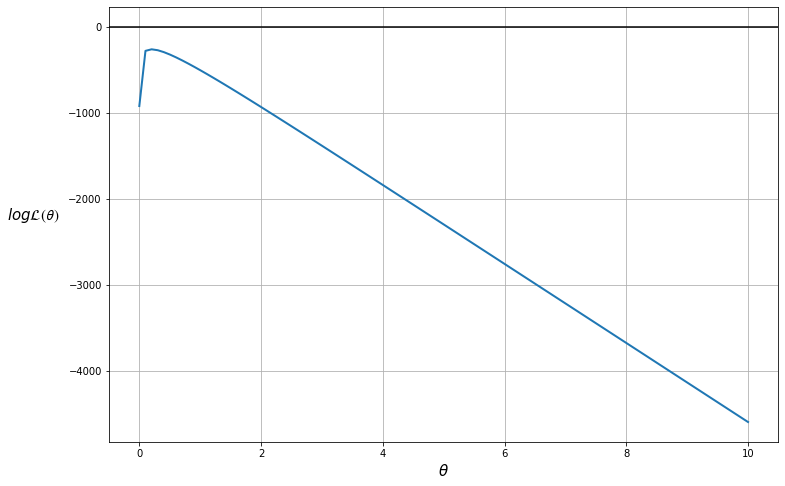

In [78]:
def geo_log_likelihood(observation, theta):
    
    s_n = sum(observation)
    n = len(observation)
    logL = []
    for item in theta:
        logL.append(n * np.log(1 - math.exp(-item)) - item * s_n)       
    return np.array(logL)


p = 0.2
size = 100
theta = np.linspace(0.0001, 10, 100)
np.random.seed(0)
# generating geometric samples
k = np.random.geometric(p, size)

logL = geo_log_likelihood(k, theta)
result = np.where(logL == np.amax(logL))
print('parameter value (theory): ', np.log(1+len(k)/sum(k)))
print('parameter value: ', theta[int(result[0])])
print('optimum value of temperature (theory): ', 1/np.log(1+len(k)/sum(k)))
print('optimum value of temperature: ', 1/theta[int(result[0])])

show_plot(theta, logL)

<b><span style="color:red">Example #10</span></br>
<span style="text-decoration:underline">Direct calculation of the moments</span><br />
<span>We have a six-sided die that we want to test for fairness, and we 
formulate two hypotheses for the probabilities of the six faces: 
<br>$H_{0}$ (fair die): $p_{X}(x; H_{0}) = \frac{1}{6}  \text{x = 1, ..., 6}$
<br>$H_{1}$ (loaded die): $p_{X} (x; H_{1}) = 
\begin{align}
\left\{
\begin{array}{cl}
\frac{1}{4} & \text{if x = 1, 2}\\
\frac{1}{8} & \text{if x = 3, 4, 5, 6}
\end{array}
\right.
\end{align}$
<br>for finding the likelihood ratio function, critical values, probability of false rejection($\alpha$)
and probability of false acceptance($\beta$):

<b><span style="color:red">Code Section for Example #10</span></br>

In [79]:
def likelihood_ratio_for_single_roll(x, p_fair, p_loaded):
    L_ratio = []
    for i in range(len(x)):
        L_ratio.append(p_loaded[i] / p_fair[i])
    return np.array(L_ratio)


def false_rejection(x, p_fair, p_loaded, critical_values, L_ratio, xi):
    
    cv_min = np.min(critical_values)
    cv_max = np.max(critical_values)
    
    p_reject = 0
    for i in range(len(x)):
        if(p_loaded[i] / p_fair[i] >= cv_max):
            p_reject += p_fair[i]
        
    if(xi < cv_min):
        alpha = 1
    elif(xi > cv_max):
        alpha = 0
    else:
        alpha = p_reject
    
    return alpha


def false_acceptance(x, p_fair, p_loaded, epsilon, L_ratio, xi):
    
    cv_min = np.min(critical_values)
    cv_max = np.max(critical_values)
    
    p_accept = 0
    for i in range(len(x)):
        if(p_loaded[i] / p_fair[i] >= cv_max):
            p_accept += p_loaded[i]
        
    if(xi < cv_min):
        beta = 0
    elif(xi > cv_max):
        beta = 1
    else:
        beta = p_accept
    
    return beta


x = np.arange(6) + 1
# H0 or null hypothesis is about fairness of dice
p_fair = (1/6) * np.ones((1, 6))[0]
# H1 or alternative hypothesis is about unfairness of dice
p_loaded = [0.25, 0.25, 0.125, 0.125, 0.125, 0.125]

# L(x) = px (x; H1)/ px(x; H0) 
L_ratio = likelihood_ratio_for_single_roll(x, p_fair, p_loaded)
print('likelihood ratio function: ', L_ratio)

# critical values are unique vals in L_ratio vector
critical_values = np.unique(L_ratio)
print('critical values: ', critical_values)

xi = 1.25
alpha = false_rejection(x, p_fair, p_loaded, critical_values, L_ratio, xi)
print(f'for xi = {xi} , alpha(xi) is: {alpha}')

beta = false_acceptance(x, p_fair, p_loaded, critical_values, L_ratio, xi)
print(f'for xi = {xi} , beta(xi) is: {beta}')

likelihood ratio function:  [1.5  1.5  0.75 0.75 0.75 0.75]
critical values:  [0.75 1.5 ]
for xi = 1.25 , alpha(xi) is: 0.3333333333333333
for xi = 1.25 , beta(xi) is: 0.5


<b><span style="color:red">Example #11</span></br>
<span>A survillance camer periodically checks a certain area and records a signal $X = W$ or $X = 1 + W$ depending on whether <br>an intruder is absent or present (hypothesis $H_{0}$ or $H_{1}$, respectively). 
<br>We assume that $W$ is a normal random variable with mean 0 and kown variance $\nu$)
<br> for finding the critical region R we have:
</span>

<b><span style="color:red">Code Section for Example #11</span></br>

In [80]:
def gaussian_likelihood_ratio(x, sigma):
    L_ratio = math.exp((2*x - 1) / sigma)
    return L_ratio


def find_optimum_value_based_on_alpha(alpha, sigma):
    # in order to find the point which satisfies P{W > gamma / norm(sigma)}  1 -F(gamma / norm(sigma))
    points = np.linspace(0, 5, 500)
    for point in points:
        if 1 - scipy.stats.norm(0, 1).cdf(point) <= alpha:
            return (point * sigma)
    
    return 0


alpha = 0.025
sigma = 1
gamma = find_optimum_value_based_on_alpha(alpha, sigma)
print('gamma is: ', gamma)
print(f'rejection region: R = w > {gamma}')

w = gamma + 1
L_ratio = gaussian_likelihood_ratio(w, sigma)
print(f'Likelihood Ratio for w = {gamma + 1} is: {L_ratio}')


gamma is:  1.9639278557114228
rejection region: R = w > 1.9639278557114228
Likelihood Ratio for w = 2.9639278557114226 is: 138.08310463773574


<b><span style="color:red">Example #12</span></br>
<span>Consider the Example 9.10 where we a six-sided die once and test it for fairness. 
<br>We consider the set $\xi$ of all errors probability pairs $(\alpha(R), \beta(R))$ 
<br>as R ranges over all possible rejection regions (all subsets of the observation space ${[1, 2, 3, 4, 5, 6]}$). 
<br>The set $\xi$ is shown in below figure and it can be seen that the error probability pairs (1, 0), ($\frac{1}{3}$, $\frac{1}{2}$)and (0, 1) 
<br>associated with LTRs have the property given by the Neyman-Pearson Lemma. </span>

<b><span style="color:red">Code Section for Example #12</span></br>

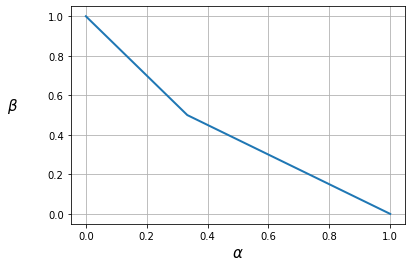

In [81]:
# all error probability ranges {(alpha(R), beta(R))}
xi = np.array([2, 1.25, 0.5])
alpha_p = []
beta_p = [] 
for item in xi:
    alpha_p.append(false_rejection(x, p_fair, p_loaded, critical_values, L_ratio, item))
    beta_p.append(false_acceptance(x, p_fair, p_loaded, critical_values, L_ratio, item))

    
# the pairs (0, 1), (1, 0), (1/3, 1/2) are the one that correspond LRTs
fig, (ax) = plt.subplots(1, sharex=True, figsize=(6, 4))
ax.plot(alpha_p, beta_p, lw=2)
ax.set_xlabel(r'$\alpha$', fontsize=15)
ax.set_ylabel(r'$\beta}$',
               rotation=0,
               labelpad=35,
               fontsize=15)
ax.grid()
plt.show()

<b><span style="color:red">Example #13</span></br>
<span style="text-decoration:underline">Rejection Regions </span><br />
<span>
We observe two i.i.d. normal random variables $X_{1}$ and $X_{2}$, with unit variance. 
<br>Under $H_{0}$ their 
common mean is 0; under $H_{1}$ their common mean is 2. 
<br>We fix the false rejection probability to $\alpha = 0.05$.
The rejection region is:
</span>

<b><span style="color:red">Code Section for Example #13</span></br>

gamma is:  2.338128635185979
rejection region, R : x1+x2 > 2.338128635185979
Likelihood Ratio is: 1.966503849392575


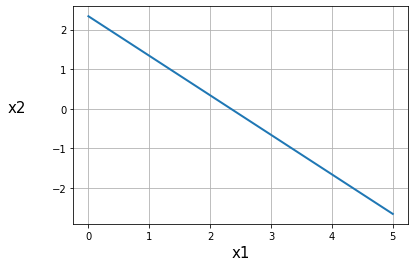

In [82]:
def gaussian_likelihood_ratio(x, mu, sigma):
    L_ratio = (sigma[1]/sigma[0])* math.exp(mu[0]*x[0] + mu[1]*x[1] - ((mu[0]**2 + mu[1]**2)/2))
    return L_ratio


def find_optimum_value_of_sumx(alpha, sigma):
    # in order to find P{Z > gamma / norm(sigma)}  1 -F(gamma / norm(sigma))
    points = np.linspace(0, 5, 500)
    for point in points:
        if 1 - scipy.stats.norm(0, 1).cdf(point) <= alpha:
            return (point * math.sqrt(sigma[0]**2 + sigma[1]**2))
    
    return 0


alpha = 0.05
mu = [2, 2]
sigma = [1, 1]
gamma = find_optimum_value_of_sumx(alpha, sigma)
print('gamma is: ', gamma)
# R = {(x1, x2) | x1 + x2 > gamma}
print(f'rejection region, R : x1+x2 > {gamma}')

x1 = 1
x2 = gamma - x1
x = [x1, x2]
L_ratio = gaussian_likelihood_ratio(x, mu, sigma)
print(f'Likelihood Ratio is: {L_ratio}')

x1 = np.linspace(0, 5, 500)
x2 = gamma - x1

fig, (ax) = plt.subplots(1, sharex=True, figsize=(6, 4))
ax.plot(x1, x2, lw=2)
ax.set_xlabel(r'x1', fontsize=15)
ax.set_ylabel(r'x2',
               rotation=0,
               labelpad=35,
               fontsize=15)
ax.grid()
plt.show()

<b><span style="color:red">Example #14</span></br>
<span style="text-decoration:underline">A Discrete Example</span><br />
<span>Consider n = 25 independent tosses of 
a coin. Under hypothesis $H_{0}$ (respectively, $H_{1}$ ), <br> the probability of a head at each 
toss is equal to $\theta_{0} = \frac{1}{2}$ (respectively, $\theta_{1} = \frac{2}{3}$). <br>
Let X be the number of heads 
observed. If we set the false rejection probability to 0. 1, 
    <br>what is the rejection region 
associated with the LRT?
</span>

<b><span style="color:red">Code Section for Example #14</span></br>

In [83]:
from math import comb

def binomial_likelihood_ratio(k, n, theta1, theta0):
    numerator = comb(n ,k) * (theta1 ** k) * ((1 - theta1) ** (n-k))
    denominator = comb(n ,k) * (theta0 ** k) * ((1 - theta0) ** (n-k))
    L_ratio_k = numerator / denominator
    return L_ratio_k


def find_k_(n, false_rejec_p, theta0):
    # P(X > gamma; Ho) <= 0.1
    # our goal is to find required k which satisfies above equation
    k = 0
    p_x_greater_than_gamma = 0
    for i in range(n):
        p_k_H0 = comb(n ,i) * (theta0 ** k) * ((1 - theta0) ** (n-k))
        p_x_greater_than_gamma = p_x_greater_than_gamma + p_k_H0
        if p_x_greater_than_gamma <= false_rejec_p:
            i = n
        else:
            k += 1
        
    return k

n = 25
# H0, null hypothesis
theta0 = 1/2
# H1, alternative hypothesis
theta1 = 2/3
false_rejec_p = 0.1
# because L(k) > xi <=> X > gamma 
# and we are going to find the smallest possible value for gamma
k = find_k_(n, false_rejec_p, theta0)
    
print('rejection region associated with the LRT: ', k)

rejection region associated with the LRT:  16
